# Project: Investigate medical appointment attendance in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains statistics related to medical appointment attendance in Brazil. This report will explore relationships between attendance and three attributes that are part of this dataset. The dependent variable is no-shows, and the independent variables that will be explored are SMS received, hypertension, diabetes, and alcoholism. 

> The two questions asked in this report are: 
> 1. How does receiving an SMS relate to no-shows?
> 2. How do specific medical conditions relate to no-shows?

In [108]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Exploring the characteristics of the data set:
There are 110527 appointments and 14 attributes, or columns, to explore. The data of many of the attributes are represented as either 1 or 0, representing True or False.
### General Properties

In [109]:
# Load data and print out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
# number of rows and columns
df.shape

(110527, 14)

In [111]:
# statistical characteristics of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

Unused columns are dropped, column names are formatted for consistency, and spellings are corrected. The existence of null and duplicate values are checked, but there are no null or duplicate values. The no_show column is a string datatype, and it is converted to an integer to be consistent with the other columns. 

In [112]:
#Drop columns that will not be used in this analysis
df.drop(['PatientId', 'Scholarship', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Handcap'], axis=1, inplace=True)

In [113]:
# confirm the changes
df.head()

,AppointmentID,Gender,Age,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,5642903,F,62,1,0,0,0,No
1,5642503,M,56,0,0,0,0,No
2,5642549,F,62,0,0,0,0,No
3,5642828,F,8,0,0,0,0,No
4,5642494,F,56,1,1,0,0,No


In [114]:
# fix capitalization and format, and change spelling of column names
df.rename(columns=lambda x: x.strip().lower().replace("-", "_").replace("appointmentid", "appointment_id").replace("hipertension", "hypertension"), inplace=True)

#confirm changes
df.head(1)

,appointment_id,gender,age,hypertension,diabetes,alcoholism,sms_received,no_show
0,5642903,F,62,1,0,0,0,No


In [115]:
# Check for null values. There are no null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   appointment_id  110527 non-null  int64 
 1   gender          110527 non-null  object
 2   age             110527 non-null  int64 
 3   hypertension    110527 non-null  int64 
 4   diabetes        110527 non-null  int64 
 5   alcoholism      110527 non-null  int64 
 6   sms_received    110527 non-null  int64 
 7   no_show         110527 non-null  object
dtypes: int64(6), object(2)
memory usage: 6.7+ MB


In [116]:
# No null values.
df.isnull().sum()

appointment_id    0
gender            0
age               0
hypertension      0
diabetes          0
alcoholism        0
sms_received      0
no_show           0
dtype: int64

In [117]:
# Check for duplicates. There are no duplicates.
df.duplicated().sum()

0

In [118]:
# A list of datatypes for each column.
df.dtypes

appointment_id     int64
gender            object
age                int64
hypertension       int64
diabetes           int64
alcoholism         int64
sms_received       int64
no_show           object
dtype: object

In [119]:
#Shows the unique data in the no_show column.
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [120]:
#Change attributes in no_show from 'Yes' and 'No' to 1 and 0, string to integer.
df.no_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [121]:
#The unique data in no_show has been successfully changed.
df.no_show.unique()

array([0, 1])

In [122]:
#Confirms the data type is converted.
df.dtypes

appointment_id     int64
gender            object
age                int64
hypertension       int64
diabetes           int64
alcoholism         int64
sms_received       int64
no_show            int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

What is the proportion of no-shows versus proportion present at appointments? 

First, the total number of appointments, total shows, and total no-shows will be summed and given aliases. These numbers are needed to calculate the proportion of shows and no-shows in the total number of appointments.

In [123]:
#Total number of appointments. 
total_appointments = df.appointment_id.count()
total_appointments

110527

In [124]:
#Total shows in population
present = df.no_show == False
total_shows = sum(present)
total_shows

88208

In [125]:
#Total no-shows in population
absent = df.no_show == True
total_no_shows = sum(absent)
total_no_shows

22319

There are 110527 total appointments, 88208 total shows, and 22319 no-shows.

The calculations of proportion of shows and no-shows are calculated to make a pie chart depicting percentages of shows versus no-shows.

In [126]:
#Proportion of shows in population
prop_shows = total_shows/total_appointments
prop_shows

0.798067440534892

In [127]:
#Proportion of no_shows in population
prop_no_shows = total_no_shows/total_appointments
prop_no_shows

0.20193255946510807

0.798067440534892, or about 79.8% of appointments are shows, and 0.20193255946510807, or 20.2% of appointments are no-shows.

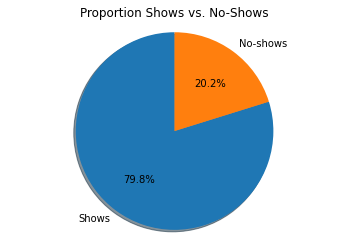

In [128]:
#Pie chart percentage shows vs. no-shows
labels = 'Shows', 'No-shows'
sizes = [prop_shows, prop_no_shows]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion Shows vs. No-Shows")
ax1.axis('equal');

The pie chart above was created to show the proportion of shows versus no-shows. 79.8% are shows and 20.2% are no-shows, and this adds up to 100%.

How many received an SMS versus how many did not receive an SMS?

The number who received an SMS and the total not sent an SMS will be used in answering the first research question.

In [129]:
#Number of SMS's received
sms = df.sms_received == True
total_sms = sum(sms)
total_sms

35482

In [130]:
#Number not sent SMS's
no_sms = df.sms_received == False
total_no_sms = sum(no_sms)
total_no_sms

75045

In [131]:
#Check to make sure number of rows correct
x = total_sms + total_no_sms
x

110527

There are a total of 35482 who received an SMS and a total of 75045 who did not receive an SMS. The total of these 2 groups add up to 110527, the total number of appointments.

The percentages of SMS received versus no SMS received will be calculated as a check on the subsequent pie chart.

In [132]:
#Percentage SMS and no SMS, check for pie chart
percent_sms = total_sms/total_appointments * 100
percent_no_sms = total_no_sms/total_appointments * 100
percent_sms, percent_no_sms

(32.10256317460892, 67.89743682539108)

32.1% received an SMS and 67.9% did not receive an SMS.

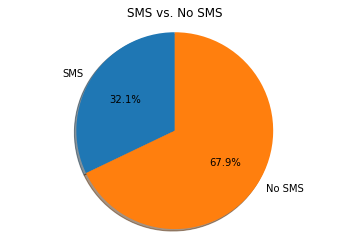

In [133]:
#Pie chart proportion SMS vs. no SMS
labels = 'SMS', 'No SMS'
sizes = [total_sms, total_no_sms]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("SMS vs. No SMS")
ax1.axis('equal');

This pie chart is made using the total numbers SMS received and SMS not received. The percentages made from the total numbers of SMS received and the SMS not received is the same as the proportions calculated earlier. 32.1% received an SMS, 67.9% did not.

The next queries find the total number in 4 groups that combine the SMS status with attendance status: SMS received and present at appointment, SMS received and absent, SMS not received and present, and SMS not received and absent. These numbers will be used later to calculated proportions in order to answer the first research question. 

In [134]:
#Number that received an SMS and present at appointment
sms_present = sms[present].sum()
sms_present

25698

In [135]:
#Number that received an SMS and absent from appointment
sms_absent = sms[absent].sum()
sms_absent

9784

In [136]:
#Number that received No SMS and present at appointment
no_sms_present = no_sms[present].sum()
no_sms_present

62510

In [137]:
#Number that received No SMS and absent from appointment
no_sms_absent = no_sms[absent].sum()
no_sms_absent

12535

In [138]:
#Check that number of appointments/rows is still correct
sms_attendance_total = sms_present + sms_absent + no_sms_present + no_sms_absent
sms_attendance_total

110527

25698 received an SMS and were present, 9784 received an SMS and were absent, 62510 did not receive an SMS and were present, 12535 did not receive an SMS and were absent. The sum of the 4 groups adds up to 110527, the total number of appointments.

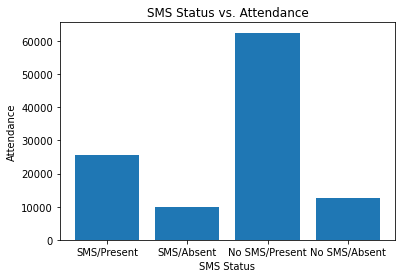

In [139]:
#Chart showing total numbers of the 4 SMS/Attendance combinations
plt.bar(["SMS/Present", "SMS/Absent", "No SMS/Present", "No SMS/Absent"], [sms_present, sms_absent, no_sms_present, no_sms_absent])
plt.title("SMS Status vs. Attendance")
plt.xlabel("SMS Status")
plt.ylabel("Attendance");

The bar chart above shows the total numbers of each of the 4 groups: SMS/Present, SMS/Absent, No SMS/Present, No SMS/Absent. The group with the best attendance was the group that did not receive an SMS. The group with the worst attendance did not receive an SMS.

How many in each disease group?

The following calculations will be used to answer the second research question.

The first step is to calculate the total number that have hypertension, diabetes, alcoholism, and those left over that have none of the diseases.

In [140]:
#How many have hypertension?
hypertension = df.hypertension == True
total_hypertension = sum(hypertension)
total_hypertension

21801

In [141]:
#How many have diabetes?
diabetes = df.diabetes == True
total_diabetes = sum(diabetes)
total_diabetes

7943

In [142]:
#How many have alcoholism?
alcoholism = df.alcoholism == True
total_alcoholism = sum(alcoholism)
total_alcoholism

3360

In [143]:
total_no_disease = total_appointments - total_hypertension - total_diabetes - total_alcoholism
total_no_disease

77423

21801 have hypertension, 7943 have diabetes, 3360 have alcoholism, and 77423 have none of the diseases.

How many no-shows in each medical group?

The next section combines the medical condition group with attendance information. It queries the number of absences in each group: hypertension, diabetes, alcoholism, and non-disease.

In [144]:
#Number hypertensive + absent
hypertension_absent = sum(hypertension[absent])
hypertension_absent

3772

In [145]:
#Number diabetes + absent
diabetes_absent = sum(diabetes[absent])
diabetes_absent

1430

In [146]:
#Number alcoholism + absent
alcoholism_absent = sum(alcoholism[absent])
alcoholism_absent

677

In [147]:
healthy_no_shows = total_no_shows - hypertension_absent - diabetes_absent - alcoholism_absent
healthy_no_shows

16440

The greatest number of no-shows are in the non-disease group (16440), followed by hypertension (3772), diabetes (1430), and alcoholism (677).

### Research Question 1: Is there a difference in no-shows between the group that receives an SMS and the group that does not receive an SMS?

Since the hospitals want to reduce no-shows, it is important to identify whether an SMS received can aid in improving attendance.

Proportional representation is used to compare attendance of SMS and non-SMS groups. 
First, the proportion present versus the proportion absent is calculated for the SMS received group.

In [148]:
#Proportion present per total sms's received
#Proportion absent per total sms's received
prop_present_sms = sms_present/total_sms
prop_absent_sms = sms_absent/total_sms
prop_present_sms, prop_absent_sms

(0.7242545516036301, 0.27574544839637)

In the SMS received group, 0.7242545516036301, or about 72.4% were present for appointments. 0.27574544839637, or about 27.6% were no-shows.

Next, the proportion present versus the proportion absent is calculated for the group that did not receive an SMS. 

In [149]:
#Proportion present per total of no SMS received
#Proportion absent per total of no SMS receieved
prop_present_no_sms = no_sms_present/total_no_sms
prop_absent_no_sms = no_sms_absent/total_no_sms
prop_present_no_sms, prop_absent_no_sms

(0.8329668865347458, 0.16703311346525418)

In the group that did not receive an SMS, 0.8329668865347458, or about 87.3% were present. 0.16703311346525418, or about 16.7% were no-shows.

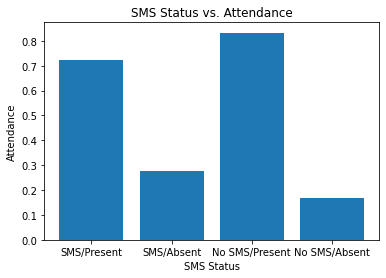

In [150]:
#Chart showing proportional representation of the 4 SMS/Attendance combinations
plt.bar(["SMS/Present", "SMS/Absent", "No SMS/Present", "No SMS/Absent"], [prop_present_sms, prop_absent_sms, prop_present_no_sms, prop_absent_no_sms])
plt.title("SMS Status vs. Attendance")
plt.xlabel("SMS Status")
plt.ylabel("Attendance");

The bar chart shows proportions of each of the 4 groups. The largest proportion of those in both the SMS received and not received groups were present at their appointments. A greater proportion of those who received an SMS were absent that those who did not receive an SMS.

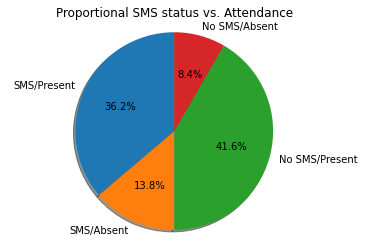

In [151]:
#Pie chart showing proportional representation of the 4 SMS/Attendance combinations
labels = 'SMS/Present', 'SMS/Absent', 'No SMS/Present', 'No SMS/Absent'
sizes = [prop_present_sms, prop_absent_sms, prop_present_no_sms, prop_absent_no_sms]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportional SMS status vs. Attendance")
ax1.axis('equal');

The pie chart is a clearer visual representation of the proportions of each of the 4 groups than the bar chart, and it supports the conclusions that can be drawn from the bar chart. The pie chart recalculates the percentages of each of the 4 groups so that the total percentage is 100%. The largest proportion present at appointments are from the No SMS group (41.6%), and the second largest present are from the SMS received group (36.2%). The largest proportion absent received an SMS (13.8%), and the smallest proportion absent did not receive an SMS (8.4%). 

### Research Question 2: Does a group with a specific medical condition factor into no-shows?

This section compares the proportion of no-shows between the groups with medical conditions and total no-shows.

Comparing no-shows between disease groups and healthy groups is important because it will help the healthcare system identify if there are barriers to attending appointments within any of the groups.

First, the proportion of no-shows in the hypertension, diabetes, alcoholism, and healthy groups are calculated.

In [152]:
#Proportion no_shows that are hypertensive
prop_hyper_no_shows = hypertension_absent/total_hypertension
prop_hyper_no_shows

0.17301958625751113

The proportion of no-shows in the hypertension group is 0.17301958625751113, or about 17.3%.

In [153]:
#Proportion no_shows with diabetes
prop_diabetes_no_shows = diabetes_absent/total_diabetes
prop_diabetes_no_shows

0.18003273322422259

The proportion of no-shows in the diabetes group is 0.18003273322422259, or about 18.0%.

In [154]:
#Proportion no_shows with alcoholism
prop_alcoholism_no_shows = alcoholism_absent/total_alcoholism
prop_alcoholism_no_shows

0.20148809523809524

The proportion of no-shows in the alcoholism group is 0.20148809523809524, or about 20.1%

In [155]:
#Proportion of no_shows who do not have one of the 3 diseases
prop_healthy_no_shows = healthy_no_shows/total_no_disease
prop_healthy_no_shows

0.21234000232489053

The proportion of no-shows in the healthy group is 0.21234000232489053, or about 21.2%.

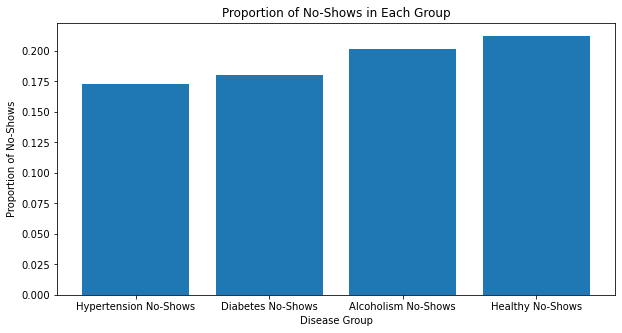

In [156]:
#Bar chart for proportion of no-shows in each group
plt.subplots(figsize=(10, 5))
plt.bar(["Hypertension No-Shows", "Diabetes No-Shows", "Alcoholism No-Shows", "Healthy No-Shows"], [prop_hyper_no_shows, prop_diabetes_no_shows, prop_alcoholism_no_shows, prop_healthy_no_shows])
plt.title("Proportion of No-Shows in Each Group")
plt.xlabel("Disease Group")
plt.ylabel("Proportion of No-Shows");

The bar chart above is a visual representation of the smallest to largest proportion of no-shows by group. The healthy group had the greatest proportion of no-shows (.2123), followed by alcoholism (.2015), diabetes (.1800), and hypertension (.1730). 

<a id='conclusions'></a>
## Conclusions

> The main goal of this report is to report if a group has proportionally more or fewer no-shows than other groups, but a main limitation of this report is that it does not address statistical significance of results or delve into the possible causes of the results.

> How does receiving an SMS relate to no-shows?
> Fewer people received an SMS (32.1%) than did not receive an SMS (67.9%). We do not know why some people received an SMS and some did not. 13.8% of those who received an SMS were absent while 8.4% of those who did not receive an SMS were present, so a larger proportion of those who received an SMS were absent than those who did not.

> How do specific medical conditions relate to no-shows?
> This report explored each condition separately, but did not take into account that one person can potentially have multiple conditions.
> The largest proportion of no-shows are in the healthy group (.2123), the people who did not have hypertension, diabetes, or alcoholism. The second largest proportion is in the alcoholism group (.2015). The diabetes (.1800) and hypertension (.1730) groups have a lower proportion of no-shows. 